In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# TODO: Think harder about this loss score does it make sense?
# WHICH IS WRONG OLD OR NEW???

In [3]:
#sites = ['ADHD1',
#        'ADHD3',
#        'ADHD5',
#        'ADHD6',
#        'HSJ',
#        'Svip1',
#        'Svip2',
#        'SZ3',
#        'SZ6',
#        'UCLA_CB',
#        'UCLA_DS1',
#        'UKBB11025',
#        'UKBB11026',
#        'UKBB11027']

# Order by n in site
sites = ['USM', # why this missing?
        'SZ3',
        'SZ6',
        'Svip2',
        'ADHD6',
        'HSJ',
        'SZ2',
        'SZ1',
        'UCLA_CB',
        'Svip1',
        'UKBB11026',
        'UKBB11027',
        'UKBB11025',
        'ADHD1',
        'ADHD3',
        'NYU',
        'ADHD5',
        'UCLA_DS1']

p_age = '../../results_reviews/age/'

In [4]:
nsite = {'ABIDEII-BNI_1': 6,
 'ABIDEII-ETH_1': 23,
 'ABIDEII-GU_1': 26,
 'ABIDEII-IP_1': 7,
 'ABIDEII-IU_1': 3,
 'ABIDEII-KKI_1': 17,
 'ABIDEII-NYU_1': 27,
 'ABIDEII-OHSU_1': 27,
 'ABIDEII-OILH_2': 13,
 'ABIDEII-SDSU_1': 21,
 'ABIDEII-SU_2': 7,
 'ABIDEII-TCD_1': 18,
 'ABIDEII-UCD_1': 10,
 'ABIDEII-UCLA_1': 9,
 'ABIDEII-USM_1': 13,
 'ABIDEII-U_MIA_1': 10,
 'ADHD1': 54,
 'ADHD3': 56,
 'ADHD4': 14,
 'ADHD5': 77,
 'ADHD6': 39,
 'Cardiff': 8,
 'HSJ': 39,
 'KKI': 22,
 'LEUVEN_1': 5,
 'MAX_MUN': 11,
 'NYU': 66,
 'OLIN': 8,
 'SDSU': 13,
 'SZ1': 42,
 'SZ10': 9,
 'SZ2': 41,
 'SZ3': 31,
 'SZ4': 25,
 'SZ5': 17,
 'SZ6': 35,
 'SZ7': 14,
 'SZ8': 14,
 'SZ9': 14,
 'Svip1': 48,
 'Svip2': 36,
 'TRINITY': 25,
 'UCLA_1': 24,
 'UCLA_2': 5,
 'UCLA_CB': 43,
 'UCLA_DS1': 94,
 'UCLA_DS2': 19,
 'UKBB11025': 50,
 'UKBB11026': 50,
 'UKBB11027': 50,
 'UM_1': 10,
 'USM': 30,
 'YALE': 15}

# Load Data

In [5]:
# Single Task
st_data = []
for site in sites:
    folds = []
    for fold in range(5):
        p_parent = os.path.join(p_age, f"{site}/fold_{fold}")
        file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
        folds.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])[site])
    st_data.append(folds)

st_data = dict(zip(sites,st_data))

In [6]:
# Multi-task
mtl_data = []
for fold in range(5):
    p_parent = os.path.join(p_age, f"all/fold_{fold}")
    file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
    mtl_data.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1]))


# Get Loss

In [7]:
# Single Task
st_loss = []
st_loss_std = []
for site in sites:
    vals = [st_data[site][fold]['Loss/test'].iloc[-1] for fold in range(5)]
    st_loss.append(np.mean(vals))
    st_loss_std.append(np.std(vals))

st_loss = pd.Series(st_loss,index=sites)
st_loss_std = pd.Series(st_loss_std,index=sites)

In [8]:
# Multi-task
mtl_loss = []
for fold in range(4): # missing last fold
    df = mtl_data[fold].transpose().reset_index()
    df = df[df['level_1']=='Loss/test'].set_index('level_0')[99]
    mtl_loss.append(df)
    
mtl_loss_std = pd.concat(mtl_loss,axis=1).std(axis=1)
mtl_loss = pd.concat(mtl_loss,axis=1).mean(axis=1)

# Tables

In [9]:
df = pd.concat([st_loss,mtl_loss,st_loss_std,mtl_loss_std],axis=1)
df.columns = ['ST','MTL','ST_std','MTL_std']
df['diff'] = df['MTL'] - df['ST']
df

,ST,MTL,ST_std,MTL_std,diff
USM,48.632639,34.253823,11.501800,17.233852,-14.378816
SZ3,95.530932,92.706835,10.306406,30.983281,-2.824097
SZ6,70.897920,104.875082,15.861246,69.994832,33.977162
Svip2,88.058361,82.007586,43.856557,16.827608,-6.050775
ADHD6,2.182424,1.562951,1.119099,1.011304,-0.619473
HSJ,220.135678,189.189412,77.567312,163.217253,-30.946266
SZ2,111.871177,70.962783,68.392353,60.276339,-40.908394
SZ1,100.690190,57.006026,57.700863,17.407834,-43.684165
UCLA_CB,19.307808,28.234512,7.443978,13.621034,8.926704
Svip1,116.133428,108.433619,42.325873,51.484367,-7.699808


In [10]:
df.mean()

ST         71.685245
MTL        67.331673
ST_std     24.858139
MTL_std    36.260699
diff       -4.353572
dtype: float64

# Plots

In [11]:
lenmax = 25
site_labels = []
for site in sites:
    n = f'{nsite[site]}'
    nspaces = lenmax - 2*len(site) - len(n)
    label = site.upper()+(' '*nspaces)+f'n={n}'
    site_labels.append(label)
    print(f"'{label}',")

'USM                 n=30',
'SZ3                 n=31',
'SZ6                 n=35',
'SVIP2             n=36',
'ADHD6             n=39',
'HSJ                 n=39',
'SZ2                 n=41',
'SZ1                 n=42',
'UCLA_CB         n=43',
'SVIP1             n=48',
'UKBB11026     n=50',
'UKBB11027     n=50',
'UKBB11025     n=50',
'ADHD1             n=54',
'ADHD3             n=56',
'NYU                 n=66',
'ADHD5             n=77',
'UCLA_DS1       n=94',


In [12]:
site_labels = [
'USM                n=30',
'SZ3                  n=31',
'SZ6                  n=35',
'SVIP2              n=36',
'ADHD6            n=39',
'HSJ                  n=39',
'SZ2                  n=41',
'SZ1                  n=42',
'UCLA_CB        n=43',
'SVIP1               n=48',
'UKBB11026      n=50',
'UKBB11027      n=50',
'UKBB11025      n=50',
'ADHD1             n=54',
'ADHD3             n=56',
'NYU                  n=66',
'ADHD5             n=77',
'UCLA_DS1       n=94',]

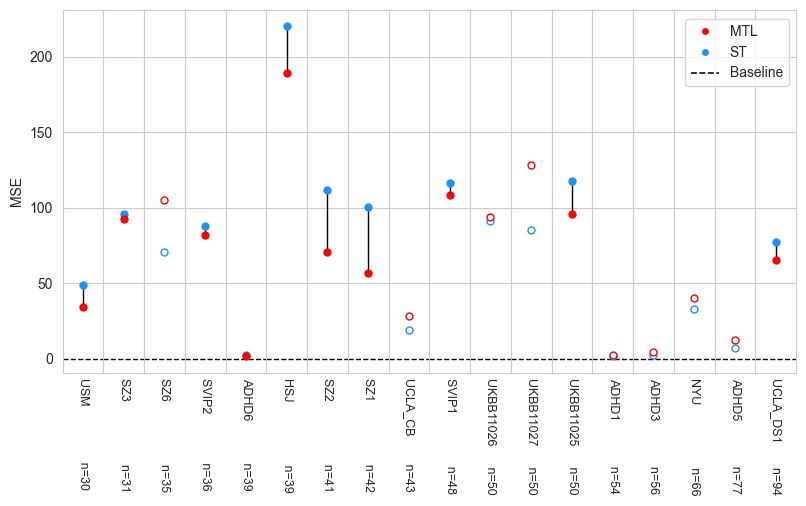

In [21]:
###############
# CONNECTOMES #
###############
title = 'Age - Single vs Multi-Task - MLPconn_reg'
fig,ax = plt.subplots(1,len(sites),figsize=(8,5),sharey=True,sharex=True)
#plt.yticks([40,50,60,70,80,90])
sns.set_style('whitegrid')
colors = ['black','darkorchid','red','orange','dodgerblue','forestgreen']

for j,site in enumerate(sites):
    st_loss = df.loc[site]['ST']
    mtl_loss = df.loc[site]['MTL']
    # DIRECTION IS INVERTED FOR LOSS
    if st_loss < mtl_loss:
        mfc_mtl = 'white'
        mfc_st = 'white'
        ls =''
    else:
        mfc_mtl = colors[2]
        mfc_st = colors[-2]
        ls = '-'

    ax[j].plot((5,5),(st_loss,mtl_loss),color=colors[0],ls=ls,linewidth=1)
    ax[j].plot(5,st_loss,marker='o',color=colors[-2],ms=5,markerfacecolor=mfc_st)
    ax[j].plot(5,mtl_loss,marker='o',color=colors[2],ms=5,markerfacecolor=mfc_mtl)
    ax[j].set_xticklabels([])
    ax[j].set_xticks([])
    ax[j].set_xlabel(site_labels[j],rotation=270,fontsize=9)

    lines = ax[j].get_ygridlines()
    b = lines[1]
    b.set_color('black')
    b.set_linewidth(1)
    b.set_linestyle('--')

from matplotlib.lines import Line2D
handles = [Line2D([0], [0], marker='o',color='w', label='MTL',
                          markerfacecolor=colors[2]),
        Line2D([0], [0], marker='o', color='w', label='ST',
                          markerfacecolor=colors[-2]),
        Line2D([0], [0], color='black', label='Baseline',
                           linewidth=1.15,ls='--')
                          ]
labels = ['MTL','ST','Baseline']
fig.legend(handles, labels, loc=(0.85,0.83))

ax[0].set_ylabel('MSE')
#plt.suptitle(title)
plt.tight_layout(pad=0.5)
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join('./figures/age_loss.png'),dpi=300)